# Titanic: Machine Learning from Disaster

This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#sns.set_palette('cool')

## Load train and test dataset

In [2]:
train_data = pd.read_csv('dataset/titanic/train.csv')

In [3]:
test_data = pd.read_csv('dataset/titanic/test.csv')

## EDA - Exploratory data analysis

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:
- Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
- Pclass: passenger class (1 = 1st, 2 = 2nd, 3 = 3rd)
- Name, Sex, Age: self-explanatory
- SibSp: how many siblings & spouses of the passenger aboard the Titanic.
- Parch: how many children & parents of the passenger aboard the Titanic.
- Ticket: ticket id
- Fare: price paid (in pounds)
- Cabin: passenger's cabin number
- Embarked: where the passenger embarked the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton)

Let's get more info to see how much data is missing:

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Rows = 891, Columns = 12

Okay, the **Age**, **Cabin** and **Embarked** attributes are sometimes null (less than 891 non-null), especially the **Cabin** (77% are null). We will ignore the **Cabin** for now and focus on the rest. The **Age** attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable.

The **Name** and **Ticket** attributes may have some value, but they will be a bit tricky to convert into useful numbers that a model can consume. So for now, we will ignore them.

Let's take a look at the numerical attributes:

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Only 38% Survived.
- The mean Fare was £32.20,
- The mean Age was less than 30 years old.

In [7]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Let's check that the target is indeed 0 or 1:

In [8]:
train_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
train_data['Cabin'].isnull().sum() / train_data.shape[0] * 100

77.10437710437711

In [10]:
train_data['Age'].isnull().sum() / train_data.shape[0] * 100

19.865319865319865

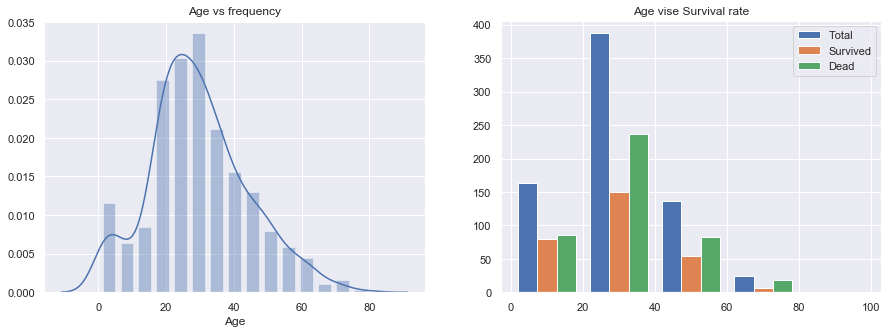

In [11]:
fx, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].set_title("Age vs frequency")
axes[1].set_title("Age vise Survival rate")
fig1_age = sns.distplot(a=train_data.Age.dropna(axis=0), bins=15, ax=axes[0], hist_kws={'rwidth':0.7})

# Creating a new list of survived and dead
pass_survived_age = train_data[train_data.Survived == 1].Age
pass_dead_age = train_data[train_data.Survived == 0].Age

axes[1].hist([train_data.Age, pass_survived_age, pass_dead_age], bins=5, range=(0, 100), label=['Total', 'Survived', 'Dead'])
axes[1].legend()
plt.show()

Now let's take a quick look at all the categorical attributes:

In [12]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

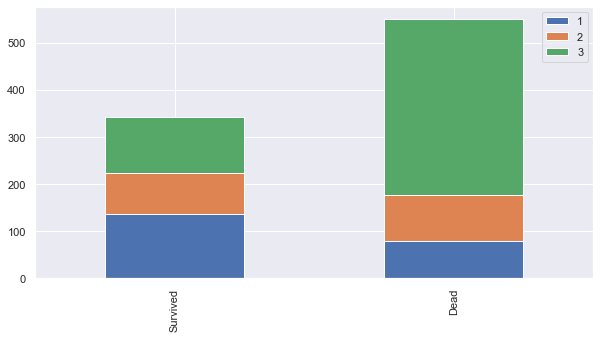

In [13]:
bar_chart('Pclass')

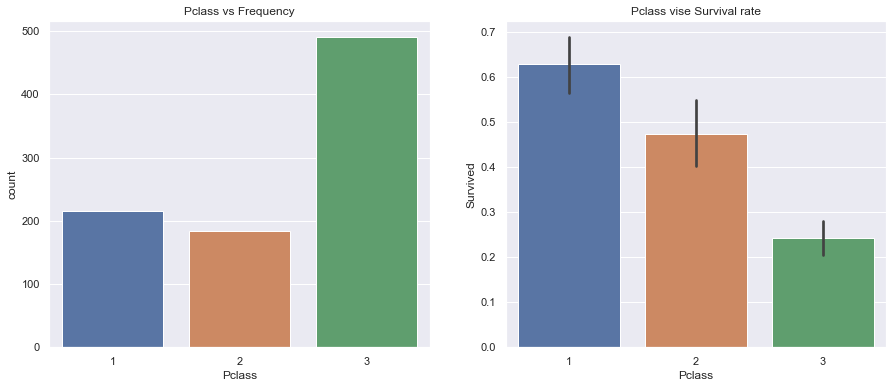

In [14]:
fx, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].set_title("Pclass vs Frequency")
axes[1].set_title("Pclass vise Survival rate")
fig1_pclass = sns.countplot(data=train_data.drop(labels='PassengerId', axis=1), x='Pclass', ax=axes[0])
fig2_pclass = sns.barplot(data=train_data.drop(labels='PassengerId', axis=1), x='Pclass',y='Survived', ax=axes[1])

The Chart confirms **1st class** more likely survivied than **other classes**

The Chart confirms **3rd class** more likely dead than **other classes**

In [15]:
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

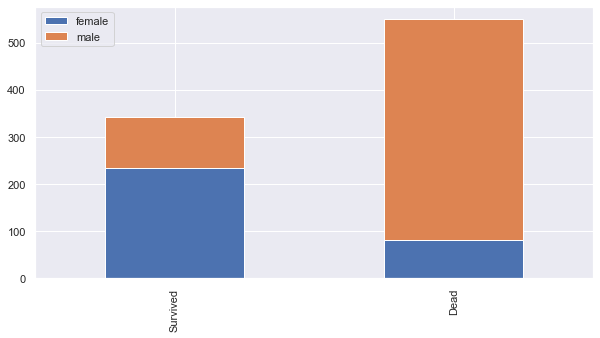

In [16]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

In [17]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

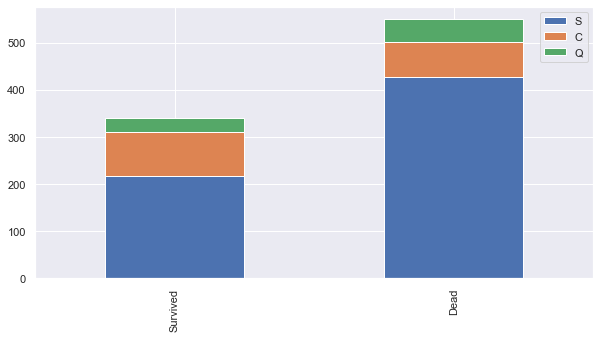

In [18]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived

The Chart confirms **a person aboarded from Q** more likely dead

The Chart confirms **a person aboarded from S** more likely dead

## Feature engineering

First up the **Name** column is currently not being used, but we can at least extract the title from the name. There are quite a few titles going around, but I want to reduce them all to Mrs, Miss, Mr and Master.  To do this we’ll need a function that searches for substrings

In [19]:
title_list = ['Mrs', 'Mr', 'Master', 'Miss', 'Major', 'Rev',
              'Dr', 'Ms', 'Mlle','Col', 'Capt', 'Mme', 'Countess',
              'Don', 'Jonkheer']

def substrings_in_string(big_string, substrings):
    for substring in substrings:
        if str.find(big_string, substring) != -1:
            return substring
    return np.nan

def replace_titles(x):
    title=x['Title']
    if title in ['Don', 'Major', 'Capt', 'Jonkheer', 'Rev', 'Col']:
        return 'Mr'
    elif title in ['Countess', 'Mme']:
        return 'Mrs'
    elif title in ['Mlle', 'Ms']:
        return 'Miss'
    elif title =='Dr':
        if x['Sex']=='Male':
            return 'Mr'
        else:
            return 'Mrs'
    else:
        return title

In [20]:
train_data['Title'] = train_data['Name'].map(lambda x: substrings_in_string(x, title_list))
test_data['Title'] = test_data['Name'].map(lambda x: substrings_in_string(x, title_list))
    
train_data['Title'] = train_data.apply(replace_titles, axis=1)
test_data['Title'] = test_data.apply(replace_titles, axis=1)

In [21]:
train_data['Title'].value_counts()

Mr        531
Miss      182
Mrs       138
Master     40
Name: Title, dtype: int64

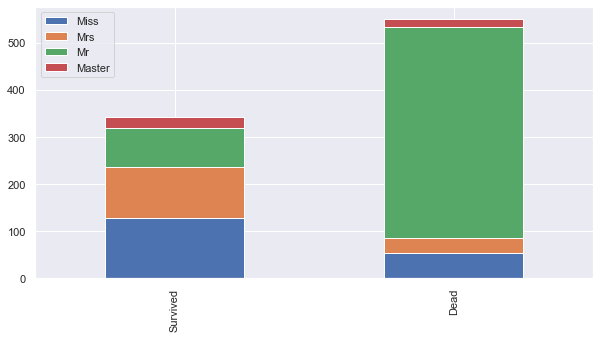

In [22]:
bar_chart('Title')

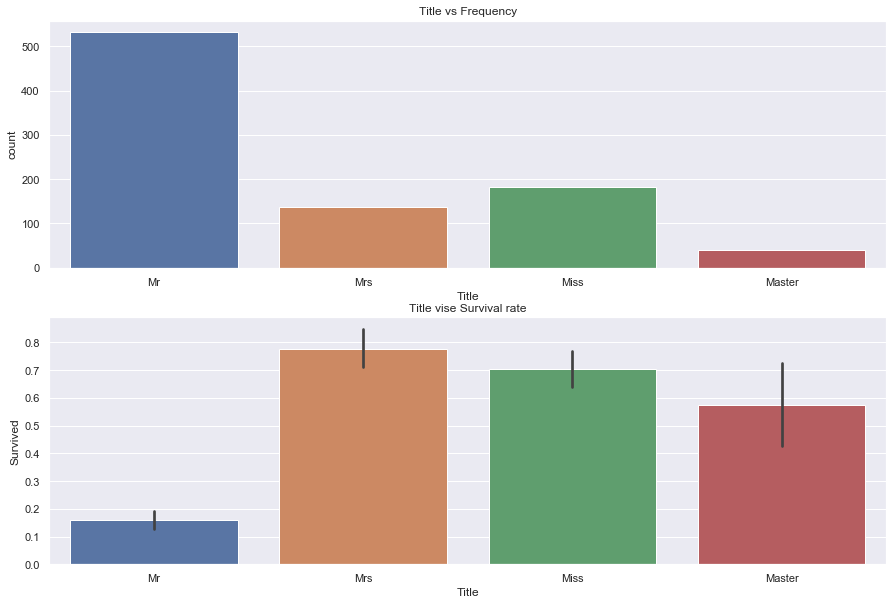

In [23]:
fx, axes = plt.subplots(2, 1, figsize=(15, 10))
axes[0].set_title("Title vs Frequency")
axes[1].set_title("Title vise Survival rate")
fig1_title = sns.countplot(data=train_data.drop(labels='PassengerId', axis=1), x='Title', ax=axes[0])
fig2_title = sns.barplot(data=train_data.drop(labels='PassengerId', axis=1), x='Title',y='Survived', ax=axes[1])

We have a ‘Cabin’ column not doing much, only 1st class passengers have cabins, the rest are ‘Unknown’. A cabin number looks like ‘C123’. The letter refers to the deck, and so we’re going to extract these just like the titles.

In [24]:
cabin_list = ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G', 'Unknown']

train_data.Cabin = train_data.Cabin.fillna('Unknown')
test_data.Cabin = test_data.Cabin.fillna('Unknown')

train_data['Deck'] = train_data['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))
test_data['Deck'] = test_data['Cabin'].map(lambda x: substrings_in_string(x, cabin_list))

In [25]:
train_data['Deck'].value_counts()

Unknown    687
C           59
B           47
D           33
E           33
A           15
F           12
G            4
T            1
Name: Deck, dtype: int64

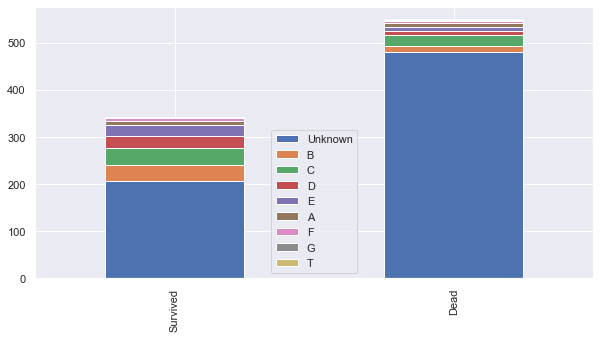

In [26]:
bar_chart('Deck')

One thing we can do to create new features is linear combinations of features. In a model like linear regression this should be unnecessary, but for a decision tree may find it hard to model such relationships. Reading on the forums at Kaggle, some people have considered the size of a person’s family, the sum of their ‘SibSp’ and ‘Parch’ attributes. Perhaps people traveling alone did better? Or on the other hand perhaps if you had a family, you might have risked your life looking for them, or even giving up a space up to them in a lifeboat. Let’s throw that into the mix.

In [27]:
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch']
test_data['Family_Size'] = test_data['SibSp'] + test_data['Parch']

This is an interaction term, since age and class are both numbers we can just multiply them.

In [28]:
train_data['Age*Class'] = train_data['Age'] * train_data['Pclass']
test_data['Age*Class'] = test_data['Age'] * test_data['Pclass']

Here we divide the fare by the number of family members traveling together, I’m not exactly sure what this represents, but it’s easy enough to add in.

In [29]:
train_data['Fare_Per_Person'] = train_data['Fare'] / (train_data['Family_Size']+1)
test_data['Fare_Per_Person'] = test_data['Fare'] / (test_data['Family_Size']+1)

Let's build the pipeline for the numerical attributes:

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
    ])

We will also need an imputer for the string categorical columns (the regular SimpleImputer does not work on those):

In [31]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Now we can build the pipeline for the categorical attributes:

In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ('imputer', MostFrequentImputer()),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

Finally, let's join the numerical and categorical pipelines:

In [33]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Age*Class', 'Fare_Per_Person']
cat_attribs = ['Pclass', 'Sex', 'Embarked', 'Title', 'Deck']

full_pipeline = ColumnTransformer([
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attribs),
    ])

X_train = full_pipeline.fit_transform(train_data)

Cool! Now we have a nice preprocessing pipeline that takes the raw data and outputs numerical input features that we can feed to any Machine Learning model we want.

Let's not forget to get the labels:

In [34]:
y_train = train_data['Survived']

## Select and train a model

In [35]:
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [36]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### Dummy classifier

In [37]:
dmy_clf = DummyClassifier()
dmy_clf.fit(X_train, y_train)

dmy_scores = cross_val_score(dmy_clf, X_train, y_train, cv=k_fold)
dmy_scores.mean()

0.517378277153558

Okay, over 50% accuracy using random classifier. We should do better than that.

### SVM

In [38]:
svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=k_fold)
svm_scores.mean()

0.6970536828963796

Okay, over 69% accuracy, clearly better than dummy chance.

### Random Forest Classifier

In [40]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=k_fold)
forest_scores.mean()

0.8136828963795256

That's much better!

### KNN

In [41]:
knn_clf = KNeighborsClassifier(n_neighbors = 13)
knn_clf.fit(X_train, y_train)
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=k_fold)
knn_scores.mean()

0.7160549313358302

### Decision Tree

In [42]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=k_fold)
tree_scores.mean()

0.7766416978776529

### Naive Bayes

In [43]:
naive_clf = DecisionTreeClassifier()
naive_clf.fit(X_train, y_train)
naive_scores = cross_val_score(naive_clf, X_train, y_train, cv=k_fold)
naive_scores.mean()

0.769900124843945

### Logistic Regression

In [62]:
logistic_clf = LogisticRegression(solver='lbfgs', max_iter=10000)
logistic_clf.fit(X_train, y_train)
logistic_scores = cross_val_score(logistic_clf, X_train, y_train, cv=k_fold)
logistic_scores.mean()

0.8304993757802747

Instead of just looking at the mean accuracy across the 10 cross-validation folds, let's plot all 10 scores for each model, along with a box plot highlighting the lower and upper quartiles

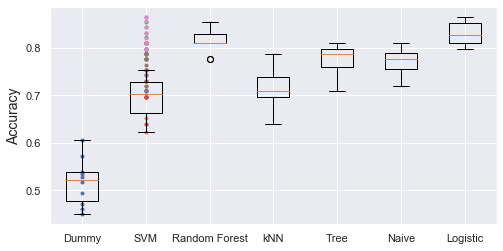

In [63]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, dmy_scores, '.')
plt.plot([2]*10, svm_scores, '.')
plt.plot([2]*10, forest_scores, '.')
plt.plot([2]*10, knn_scores, '.')
plt.plot([2]*10, tree_scores, '.')
plt.plot([2]*10, naive_scores, '.')
plt.plot([2]*10, logistic_scores, '.')
plt.boxplot([dmy_scores, svm_scores, forest_scores, knn_scores, tree_scores, naive_scores, logistic_scores],
            labels=('Dummy', 'SVM', 'Random Forest', 'kNN', 'Tree', 'Naive', 'Logistic'))
plt.ylabel('Accuracy', fontsize=14)
plt.show()

## Fine-tuning

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 20 (5×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30, 100, 200], 'max_features': [2, 4, 6, 8],}
  ]

clf = RandomForestClassifier(random_state=42)

# train across 10 folds, that's a total of 20*10=200 rounds of training 
grid_search = GridSearchCV(clf, param_grid, cv=k_fold, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
    

In [60]:
grid_search.score(X_train, y_train)

0.9865319865319865

In [61]:
clf_scores = cross_val_score(grid_search, X_train, y_train, cv=k_fold)
clf_scores.mean()

C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\guilh\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8081273408239701

## Predict

Great, our model is trained, let's use it to make predictions on the test set:

In [64]:
X_test = full_pipeline.transform(test_data)
y_pred = logistic_clf.predict(X_test)

And now we could just build a CSV file with these predictions (respecting the format excepted by Kaggle), then upload it and hope for the best.

## Submission

In [65]:
output = pd.DataFrame({
        'PassengerId': test_data['PassengerId'],
        'Survived': y_pred
    })

output.to_csv('submission.csv', index=False)

In [66]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
